## **California Housing prediction version 2**

### 1. Importing Libaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_df = pd.read_csv('F:\DataMining\dataset\housing.csv')
data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data_df.shape # 20640 rows and 10 columns

(20640, 10)

In [7]:
data_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## **2. Finding Unique Values**

In [8]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
         'total_bedrooms', 'population', 'households', 'median_income',
         'median_house_value', 'ocean_proximity']
for i in columns:
    print(i + ' : ' + str(data_df[i].unique()))

longitude : [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -1

## **Checking for Null values**

In [9]:
data_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
for col in columns:
    missing_data = data_df[col].isna().sum()
    missing_data_percentage = missing_data / len(data_df) * 100
    print(f'{col} has {missing_data_percentage:.2f}% missing values')


longitude has 0.00% missing values
latitude has 0.00% missing values
housing_median_age has 0.00% missing values
total_rooms has 0.00% missing values
total_bedrooms has 1.00% missing values
population has 0.00% missing values
households has 0.00% missing values
median_income has 0.00% missing values
median_house_value has 0.00% missing values
ocean_proximity has 0.00% missing values


**Treating null values**

Dropping **207 null values** from California housing dataset, which contains over **20,000 rows**, is reasonable approach to handle missing data, as it represents less than  1% of the total dataset. This small proportion of missing values is **unlikely** to significantly impact the overall distribution or analysis of the data. By removing these rows, we can ensure that the remaining dataset is clean and **more consistent**, which help improve the reliability and accuracy of the the models used.

Furthermore, this approach **avoids the potential biases or inaccuracies** that could arise from imputing missing values, especially if the missingness does not follow a specific pattern or if the dataset is large enough to maintain its integrity without these rows. Hence, **dropping 207 null values is a pragmatic decision that balances data quality with the need for sufficient data for analysis**

In [11]:
df1 = data_df.dropna()
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## **3. Visualizing Data for Better Understanding**

<Axes: title={'center': 'Housing prices by location'}, xlabel='Longtitude', ylabel='Latitude'>

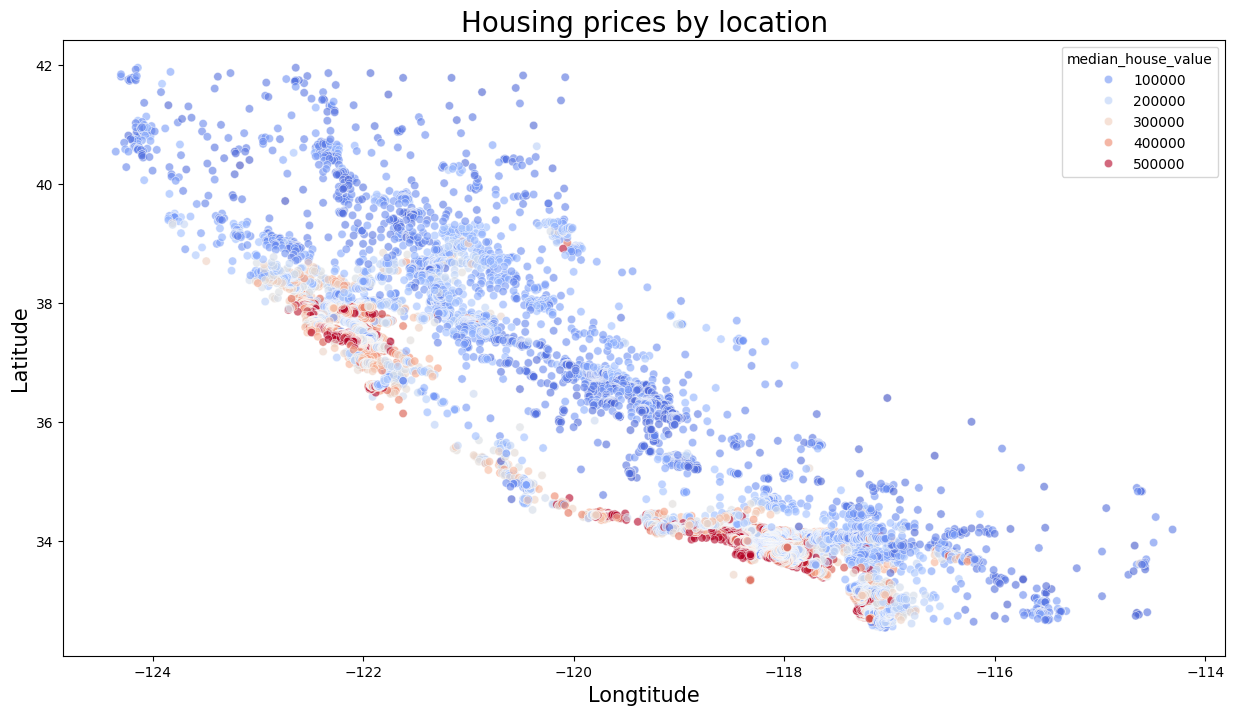

In [13]:
plt.figure(figsize=(15,8))
plt.title('Housing prices by location', size = 20)
plt.xlabel("Longtitude", size = 15)
plt.ylabel("Latitude", size = 15)
sns.scatterplot(data = df1, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.6)

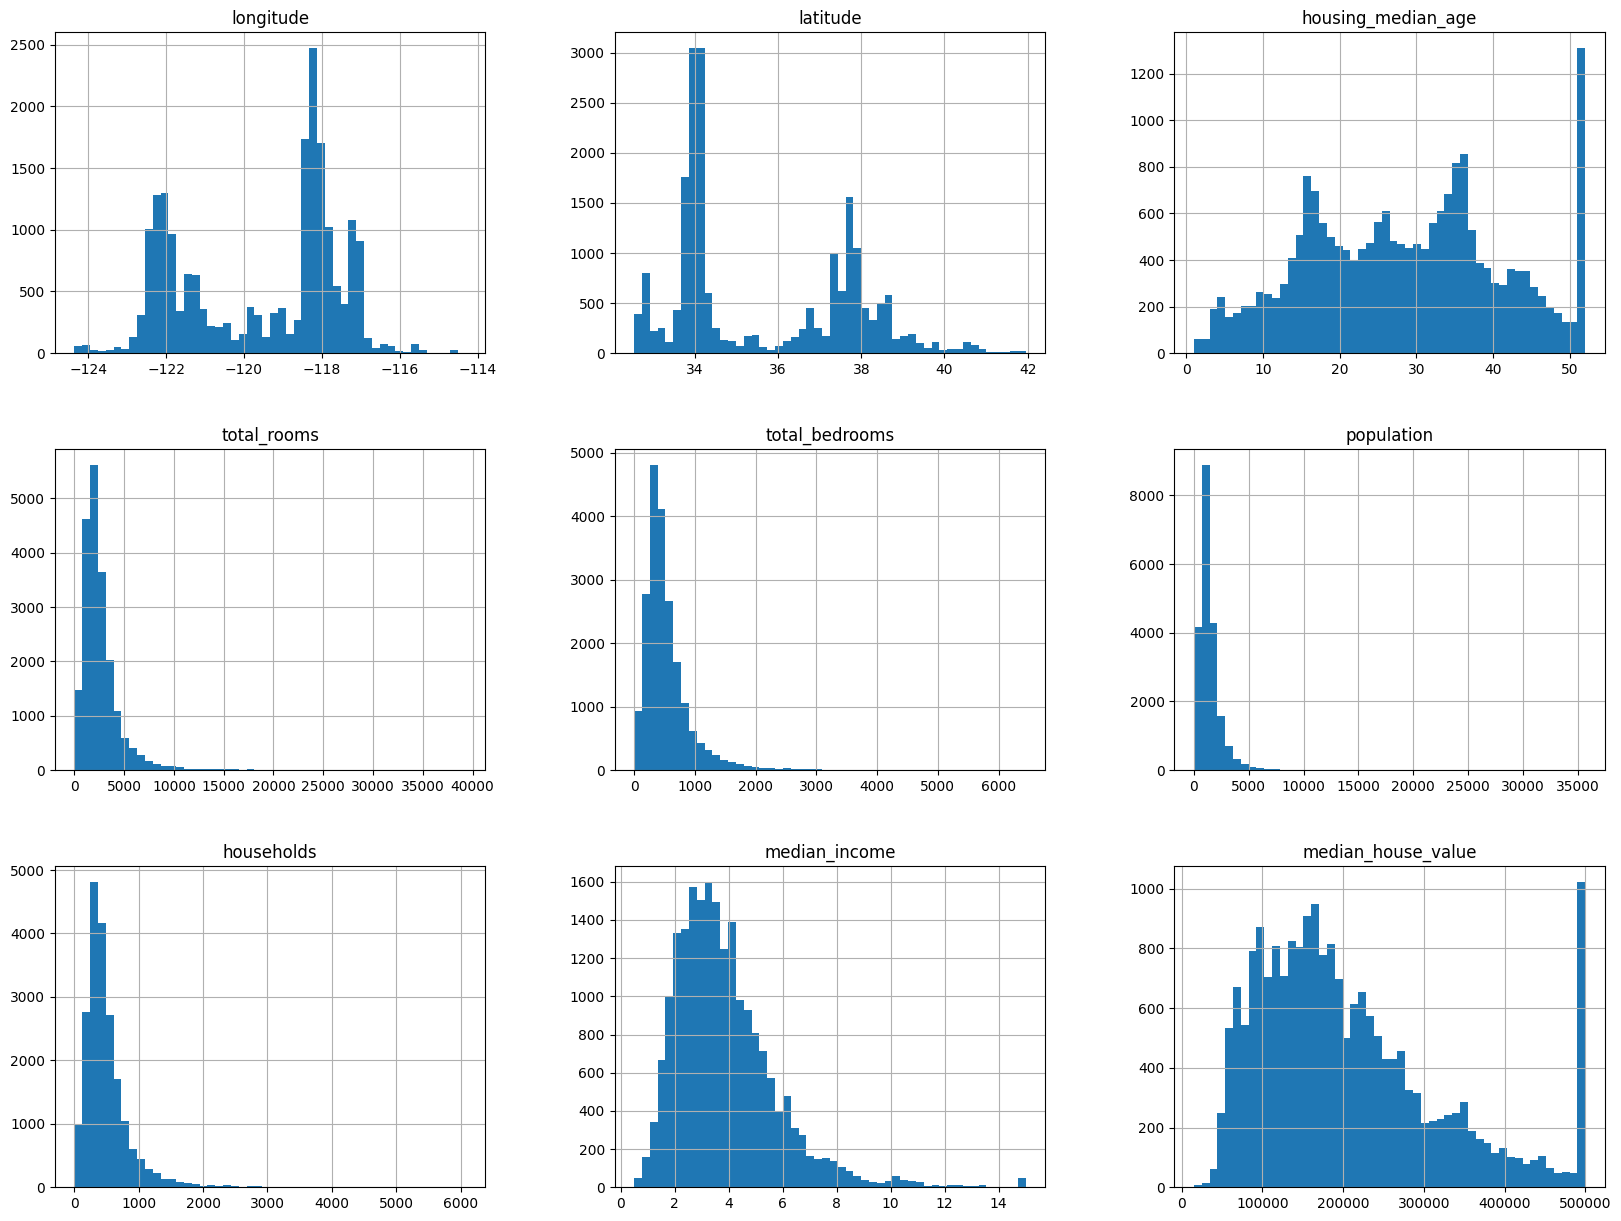

In [14]:
df1.hist(bins=50, figsize=(20,15));

Based on the Histogram, we can see that the histogram of the columns **total_rooms, total_bedrooms, population, households** tends to be very **skewed to the left**. This will cause the total data when used for training to cause the model to learn wrong patterns (Missleading Patterns). When the data is strongly skewed, the model may be biased towards the data set with higher frequency and fail to learn the general relationship.

<span style = "color: orange">**Log Transformation:** </span> Reduce the skew by taking log(1+x)

<span style = "color: red">**Box-Cox Transformation:** </span> Transform the data to be approximately normal


In [15]:
df1.iloc[:, 3:7] = np.log1p(df1.iloc[:, 3:7])

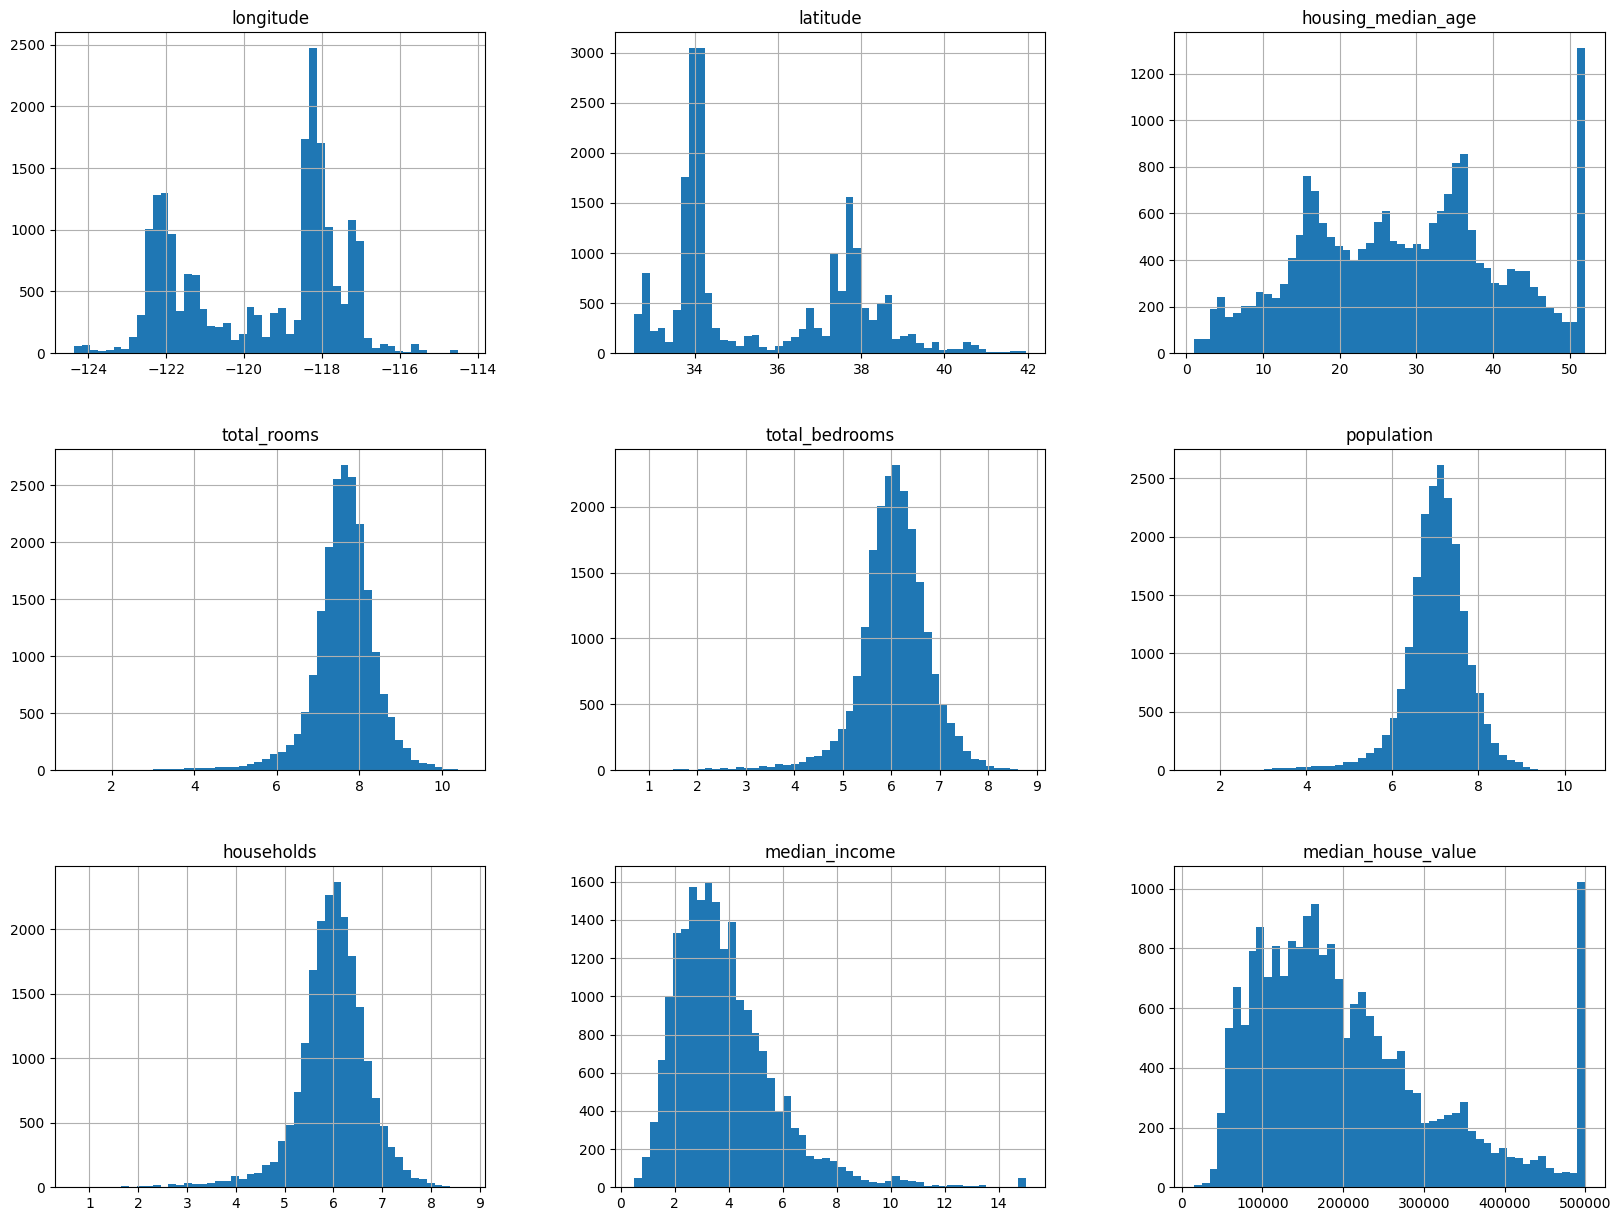

In [16]:
df1.hist(bins=50, figsize=(20,15));

**Dropping Columns with Categorical Values to draw Correlation Matrix**

In [25]:
df1 = df1.drop(["ocean_proximity"], axis=1)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


## **4. Correlation Matrix**

**Correlation Matrix** is ​​a table that shows the linear relationship between variables in a dataset. It helps us understand **the level of influence between features**
🔹 Correlation Coefficient (𝜌) has a value in the range [-1, 1]:

𝜌 = 1 → Perfect positive correlation: When one variable increases, the other also increases.

𝜌 = -1 → Perfect negative correlation: When one variable increases, the other decreases.

𝜌 = 0 → No correlation: The two variables are unrelated.

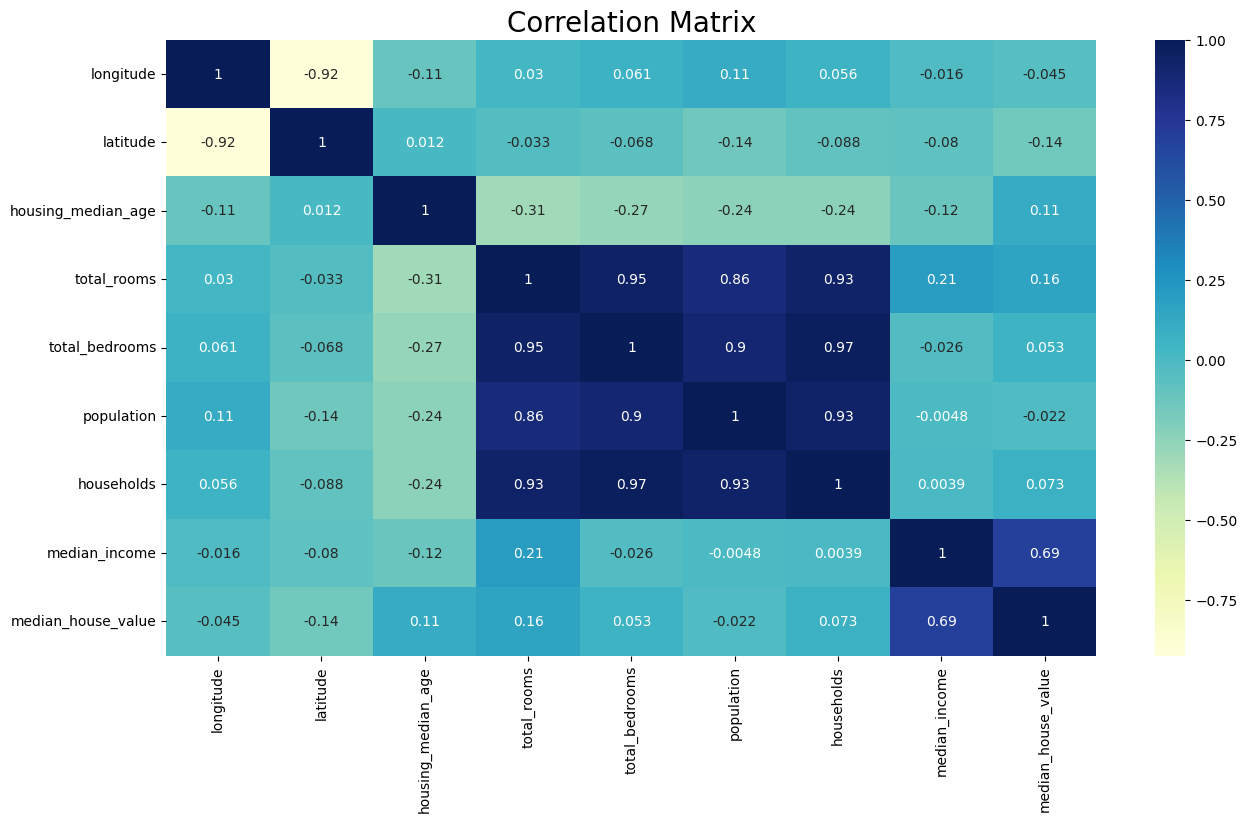

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Correlation Matrix', size = 20)
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu');


**Dealing with Categorical Values**

In [19]:
dummy_values = pd.get_dummies(df1.ocean_proximity, dtype=int)
dummy_values.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [20]:
df1 = df1.join(dummy_values)

In [28]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


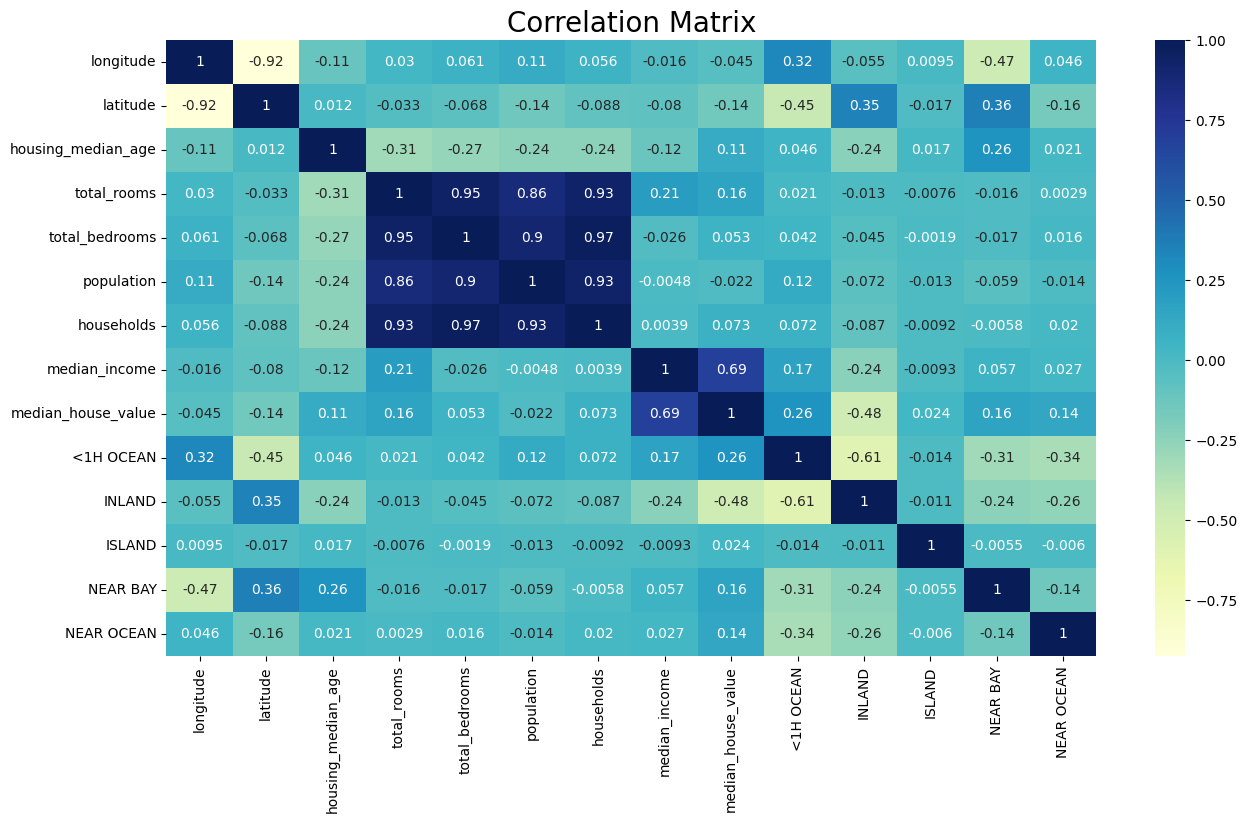

In [26]:
plt.figure(figsize=(15,8))
plt.title('Correlation Matrix', size = 20)
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu');

In [ ]:
df1.shape

(20433, 14)

## **5. Data split train and test**

In [ ]:
x = df1.drop("median_house_value", axis=1)
y = df1["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **6. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
score_reg = reg.score(x_test, y_test)

In [ ]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=1.0)  
r_model.fit(x_train, y_train)
score_ridge = r_model.score(x_test,y_test)

precentage = (score_ridge - score_reg) / score_reg * 100
print(f'Ridge Regression is {precentage:.2f}% better than Linear Regression')

Ridge Regression is 0.06% better than Linear Regression


In [ ]:
from sklearn.linear_model import Lasso
l_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
l_model.fit(x_train, y_train)
l_model.score(x_test,y_test)

0.6683658563057027